Project 1 - Classpass data analysis

In [852]:
import numpy as np
import pandas as pd
import folium 
from matplotlib import pyplot as plt
plt.style.use('ggplot')


#read in the csv file
df = pd.read_csv('friday_classpass.csv',encoding = 'unicode_escape')
df.sample(5)

,Title,Instructor,Rating,Reviews,Time,Duration,Venue,Location,Tags,Price
414,Yoga- All Level,Erika Fury,4.8,1949.0,10:00 am,75,Zen and Yoga,Forest Hills,"Flexibility, Balance, Arms, Yoga",3
1412,Pure Barre Classic,Hannah Dober,4.8,15240.0,4:30 pm,50,Pure Barre,Upper East Side,"Flexibility, Balance, Core, Abs, Barre",16
1269,BYK$20,Eric Lawrence,4.7,10287.0,4:00 pm,45,BYKlyn,Park Slope,"Cardio, Cycling",7
1262,Olaplex Blowout,none,4.8,358.0,4:00 pm,45,Glam+Go,Theatre District,NaN,41
434,Vinyasa II,Olga Palladino,4.8,9267.0,10:15 am,75,Five Pillars Yoga,Upper East Side,"Flexibility, Balance, Arms, Yoga",8


In [853]:
df.dtypes

Title         object
Instructor    object
Rating        object
Reviews       object
Time          object
Duration       int64
Venue         object
Location      object
Tags          object
Price          int64
dtype: object

In [854]:
df.columns = df.columns.str.lower() #put all headers to lower case for ease of manipulation 

In [855]:
df = df[~df['instructor'].str.contains("none")] #removes any row which has 'none' in the instructor column 

In [856]:
df = df[~df['rating'].str.contains("none")] #removes any row which has 'none' in the rating column 

In [857]:
df = df[~df['reviews'].str.contains("#VALUE!")] #removes any row which has '#VALUE!' in the reviews column 

In [858]:
(df == "none").any() #check for any none values

title         False
instructor    False
rating        False
reviews       False
time          False
duration      False
venue         False
location      False
tags          False
price         False
dtype: bool

In [859]:
df.dropna(inplace = True) #drop all NaN's

In [860]:
df.isnull().sum().sum() #double check

0

In [861]:
df["rating"]=df["rating"].astype(float) #change type

In [862]:
df["reviews"]=df["reviews"].astype(float) #change type

In [863]:
df.dtypes

title          object
instructor     object
rating        float64
reviews       float64
time           object
duration        int64
venue          object
location       object
tags           object
price           int64
dtype: object

In [864]:
df.corr()

,rating,reviews,duration,price
rating,1.000000,0.262652,-0.022287,0.267587
reviews,0.262652,1.000000,-0.199746,0.513789
duration,-0.022287,-0.199746,1.000000,-0.206737
price,0.267587,0.513789,-0.206737,1.000000


In [865]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
2,WundaBar Workout,Marta Picaporte,4.8,19814.0,8:30 am,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",16
3,BigToe Flow,Patrick Rafferty,4.8,2394.0,8:30 am,60,BigToe Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864.0,8:30 am,50,New York Pilates,Bowery,"Flexibility, Balance, Core, Abs, Pilates",25
5,Signature II,Veronika Cohen,4.9,59396.0,8:30 am,60,Physique 57,SoHo,"Flexibility, Balance, Core, Abs, Barre",12
6,Flywheel: Method 45,Cedric Green,4.8,41488.0,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,"Cardio, Cycling",13
7,EXCEED: The Workout,Jed Cabreira,4.9,25869.0,8:30 am,50,Exceed Physical Culture,Tribeca,Strength Training,12
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958.0,8:30 am,55,New York Pilates,Greenwich Village,"Flexibility, Balance, Core, Abs, Pilates",25
9,barre3,Jenna Muller,4.8,34598.0,8:30 am,60,barre3,West Village,"Flexibility, Balance, Core, Abs, Barre",16


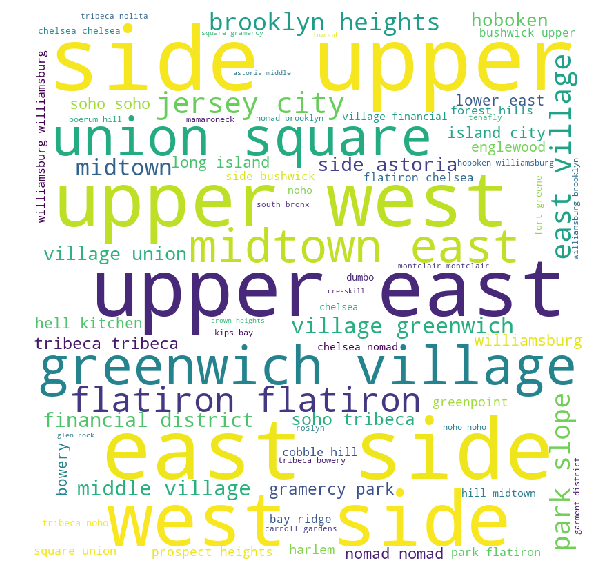

In [959]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.location: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [866]:
#in this cell we want to group by location and analyse the effect of location on the price and the rating
location = df.groupby('location').agg('count') #grouping by location and taking the count
loc_lis = location[location['title'] > 40].index.tolist() #making a list where all of the title column is greater than 10
'''try using plotly to disaply the highest concentrated areas over a map of newyork
get the latitude and longitude of each location - can find by putting it into google -
create two new columns with latitude and longitude ''' 
df_map = location[location['title'] > 20]
df_map['latitude'] = [40.7644,40.7253,40.6959,40.7465,40.7265,40.7077,40.7401,40.7336,40.7440,40.7178,40.7174,40.7549,40.7571,40.8259,40.7287,40.7446,40.6711,40.7233,40.7163,40.7359,40.7736,40.7870,40.7347,40.7081]
df_map['longitude'] = [-73.9235,-73.9903,-73.9956,-74.0014,-73.9815,-74.0083,-73.9903,-74.0027,-74.0324,-74.0431,-73.8743,-73.9840,-73.9719,-74.2090,-73.9926,-73.9874,-73.9814,-74.0030,-74.0086,-73.9911,-73.9566,-73.9754,-74.0048,-73.9571]
df_map

/Users/georgealster/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/georgealster/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,title,instructor,rating,reviews,time,duration,venue,tags,price,latitude,longitude
location,,,,,,,,,,,
Astoria,36,36,36,36,36,36,36,36,36,40.7644,-73.9235
Bowery,27,27,27,27,27,27,27,27,27,40.7253,-73.9903
Brooklyn Heights,32,32,32,32,32,32,32,32,32,40.6959,-73.9956
Chelsea,56,56,56,56,56,56,56,56,56,40.7465,-74.0014
East Village,39,39,39,39,39,39,39,39,39,40.7265,-73.9815
Financial District,27,27,27,27,27,27,27,27,27,40.7077,-74.0083
Flatiron,93,93,93,93,93,93,93,93,93,40.7401,-73.9903
Greenwich Village,58,58,58,58,58,58,58,58,58,40.7336,-74.0027
Hoboken,33,33,33,33,33,33,33,33,33,40.7440,-74.0324


In [867]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[40.738, -73.98],fill=True).add_to(folium_map)
folium_map

In [904]:
def plot_gym_counts(df_map):
    # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in df_map.iterrows():
        # calculate net departures
#         net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total gyms"
        popup_text = popup_text.format(row["title"])
        
        # radius of circles
        radius = row["title"]
        
        # choose the color of the marker
        if row["title"]>40:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#E37222" # tangerine
        else:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            popup = popup_text,
                            fill=True).add_to(folium_map)
        html_string = m._repr_html_()
    return folium_map

In [905]:
plot_gym_counts(df_map)

In [ ]:
filt_df = df[df['location'].isin(loc_lis)] #filter the dataframe for locations with more than 10 gyms 
filt_df

In [817]:
filt_df.groupby('location') #here we want to groupby location and venue

In [641]:
loc_price = filt_df.groupby('location').mean()['price'] #mean price per location 
loc_reviews = filt_df.groupby('location').mean()['reviews'] #reviews against location
loc_rating = filt_df.groupby('location').mean()['rating'] #rating against location
loc_reviews

location
Chelsea              21666.464286
Flatiron             24975.462366
Greenwich Village    16047.051724
Midtown              26275.975610
Midtown East         11333.177778
NoHo                 34190.780488
NoMad                24316.600000
SoHo                 23494.258065
Tribeca              13477.876712
Union Square         19198.862069
Upper East Side      15159.629139
Upper West Side      13076.345324
Williamsburg         11852.107692
Name: reviews, dtype: float64

In [642]:
type(loc_price)

pandas.core.series.Series

In [643]:
loc_reviews.head(4)

location
Chelsea              21666.464286
Flatiron             24975.462366
Greenwich Village    16047.051724
Midtown              26275.975610
Name: reviews, dtype: float64

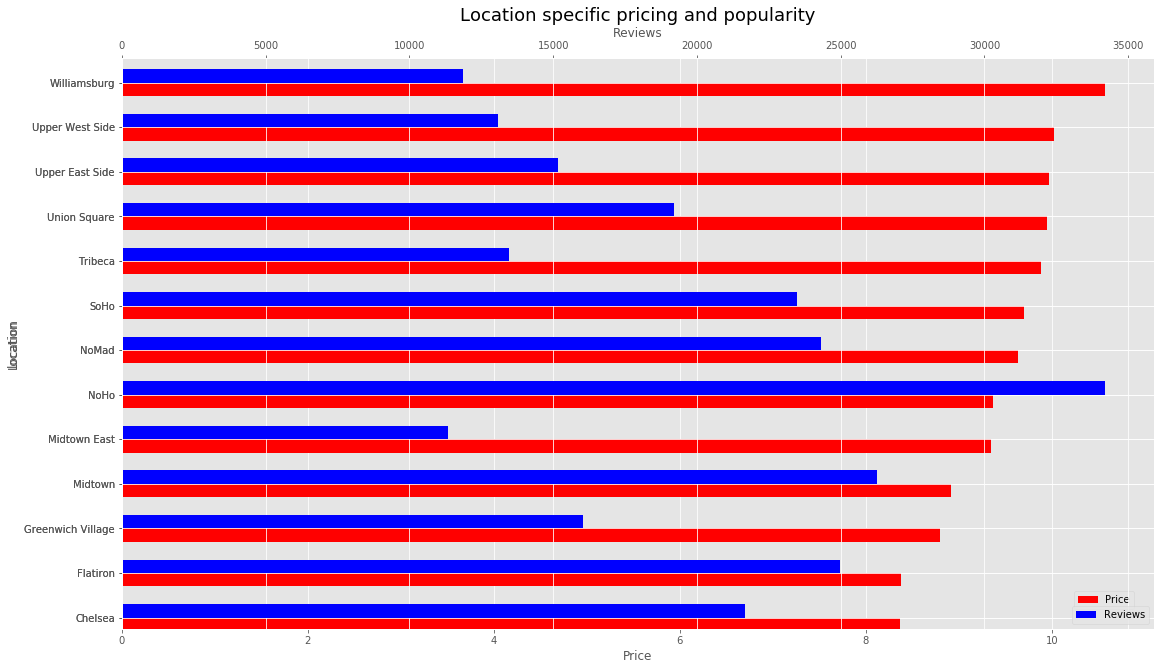

In [645]:
fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(18.5, 10.5)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = loc_price.sort_values(ascending=True).plot(kind='barh', color='r', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = loc_reviews.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Reviews')


ax.set_xlabel('Price')
ax2.set_xlabel('Reviews')
plt.ylabel('Location')
plt.title('Location specific pricing and popularity', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()



In [646]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
2,WundaBar Workout,Marta Picaporte,4.8,19814.0,8:30 am,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",16
3,BigToe Flow,Patrick Rafferty,4.8,2394.0,8:30 am,60,BigToe Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864.0,8:30 am,50,New York Pilates,Bowery,"Flexibility, Balance, Core, Abs, Pilates",25
5,Signature II,Veronika Cohen,4.9,59396.0,8:30 am,60,Physique 57,SoHo,"Flexibility, Balance, Core, Abs, Barre",12
6,Flywheel: Method 45,Cedric Green,4.8,41488.0,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,"Cardio, Cycling",13
7,EXCEED: The Workout,Jed Cabreira,4.9,25869.0,8:30 am,50,Exceed Physical Culture,Tribeca,Strength Training,12
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958.0,8:30 am,55,New York Pilates,Greenwich Village,"Flexibility, Balance, Core, Abs, Pilates",25
9,barre3,Jenna Muller,4.8,34598.0,8:30 am,60,barre3,West Village,"Flexibility, Balance, Core, Abs, Barre",16


In [731]:
'''finding the most popular gym within each main neighborhood of nyc'''


loc_ven = filt_df.groupby(['location','venue']).agg(['mean'])['reviews']
loc_ven_max = loc_ven.groupby('location').max()
loc_ven
loc_ven_max
final = loc_ven[loc_ven['mean'].isin(loc_ven_max['mean'])]
final.round()

,,mean
location,venue,
Chelsea,Peloton Cycling Studio,73326.0
Flatiron,Flywheel Sports: Stadium Cycling,60835.0
Greenwich Village,Liftonic,27331.0
Midtown,Physique 57,47410.0
Midtown East,EverybodyFights,31891.0
NoHo,Mile High Run Club,64383.0
NoMad,Mile High Run Club,73417.0
SoHo,Physique 57,59396.0
Tribeca,Flywheel Sports: Stadium Cycling,41488.0


In [768]:
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df
tag_split_df = tidy_split(df,'tags')
tag_split_df = tag_split_df.replace('Martial Arts','Martial_Arts')
tag_split_df = tag_split_df.replace(' ','')
tag_split_df
# tag_split_df.groupby('tags').count()

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Flexibility,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Balance,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Core,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Abs,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Pilates,25
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Flexibility,11
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Balance,11
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Arms,11
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Yoga,11
2,WundaBar Workout,Marta Picaporte,4.8,19814.0,8:30 am,45,WundaBar Pilates,SoHo,Flexibility,16


In [770]:
genre_list = [" Cycling"," Yoga"," Pilates"," Boxing"," Dance"," Martial_Arts"]
genres = tag_split_df[(tag_split_df['tags'].isin(genre_list))]
genre_reviews = genres.groupby('tags').mean()['reviews'] #check to see how different types of class vary with no reviews 
genre_price = genres.groupby('tags').mean()['price'] #check to see how different types of class vary with price
genre_durat = genres.groupby('tags').mean()['duration'] #check to see how different types of class vary with time
genres

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Pilates,25
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Yoga,11
2,WundaBar Workout,Marta Picaporte,4.8,19814.0,8:30 am,45,WundaBar Pilates,SoHo,Pilates,16
3,BigToe Flow,Patrick Rafferty,4.8,2394.0,8:30 am,60,BigToe Yoga,SoHo,Yoga,4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864.0,8:30 am,50,New York Pilates,Bowery,Pilates,25
6,Flywheel: Method 45,Cedric Green,4.8,41488.0,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,Cycling,13
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958.0,8:30 am,55,New York Pilates,Greenwich Village,Pilates,25
10,ISHTA Vinyasa,Mikaela Soldan,4.7,7186.0,8:30 am,60,ISHTA Yoga,Greenwich Village,Yoga,6
13,Cyc45,Michael Clement,4.8,37118.0,8:30 am,45,Cyc Fitness,Chelsea,Cycling,10
14,SHADOWBOX - STANDARD,Brendan,4.9,3651.0,8:30 am,45,Shadowbox,DUMBO,Boxing,18


Text(0.5, 1.0, 'Genre specific pricing')

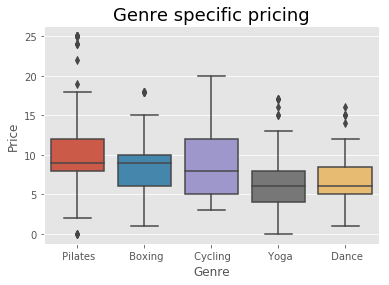

In [771]:
idx = genres.groupby('tags').median()['price'].sort_values(ascending=False).index
sns.boxplot(x='tags', y='price', data=genres,order = idx)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Genre specific pricing', fontsize=18)

tags
 Boxing      8.412371
 Cycling     8.393548
 Dance       6.486486
 Pilates    10.235521
 Yoga        6.211221
Name: price, dtype: float64


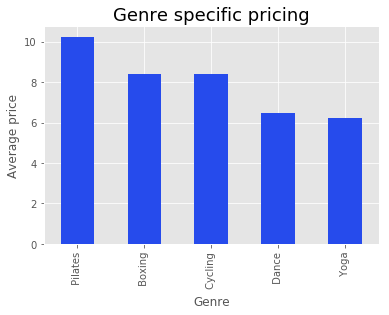

In [772]:
genre_price.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average price')
plt.title('Genre specific pricing', fontsize=18)
print(genre_price)

In [773]:
genres#.sort_values('tags',ascending = False)

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215.0,8:30 am,55,New York Pilates,SoHo,Pilates,25
1,SKY TING Yoga,Grace Dubery,4.8,17389.0,8:30 am,60,SKY TING,Tribeca,Yoga,11
2,WundaBar Workout,Marta Picaporte,4.8,19814.0,8:30 am,45,WundaBar Pilates,SoHo,Pilates,16
3,BigToe Flow,Patrick Rafferty,4.8,2394.0,8:30 am,60,BigToe Yoga,SoHo,Yoga,4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864.0,8:30 am,50,New York Pilates,Bowery,Pilates,25
6,Flywheel: Method 45,Cedric Green,4.8,41488.0,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,Cycling,13
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958.0,8:30 am,55,New York Pilates,Greenwich Village,Pilates,25
10,ISHTA Vinyasa,Mikaela Soldan,4.7,7186.0,8:30 am,60,ISHTA Yoga,Greenwich Village,Yoga,6
13,Cyc45,Michael Clement,4.8,37118.0,8:30 am,45,Cyc Fitness,Chelsea,Cycling,10
14,SHADOWBOX - STANDARD,Brendan,4.9,3651.0,8:30 am,45,Shadowbox,DUMBO,Boxing,18


Text(0.5, 1.0, 'Genre specific popularity')

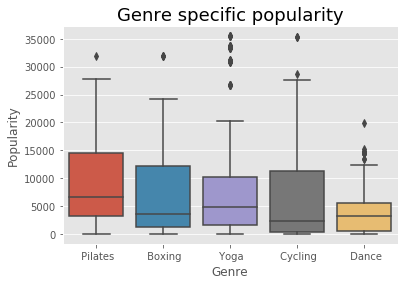

In [774]:
# genres_simple = genres.loc[genres.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)] #if they are both less than 3 standard deviations then we keep them, otherwise drop
# from scipy import stats
# genres[(np.abs(stats.zscore(df)) < 3).reviews(axis=1)]
genres_simple= genres[np.abs(genres.reviews-genres.reviews.mean()) <= (2*genres.reviews.std())]

idx = genres_simple.groupby('tags').mean()['reviews'].sort_values(ascending=False).index #note what is it ordered by
sns.boxplot(x='tags', y='reviews', data=genres_simple,order = idx)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Genre specific popularity', fontsize=18)

tags
 Boxing     10994.484536
 Cycling    21280.464516
 Dance       4725.279279
 Pilates    10710.656371
 Yoga        8057.325083
Name: reviews, dtype: float64


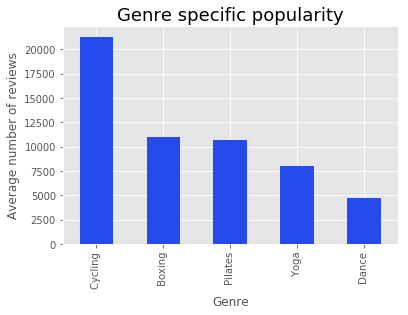

In [775]:
genre_reviews.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average number of reviews')
plt.title('Genre specific popularity', fontsize=18)
print(genre_reviews)

Text(0.5, 1.0, 'Genre specific class duration')

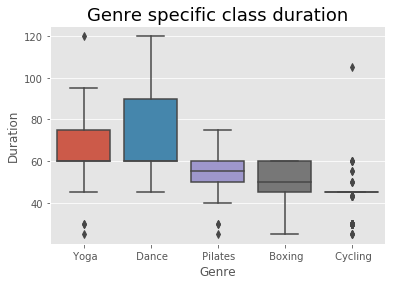

In [776]:
idx = genres.groupby('tags').median()['duration'].sort_values(ascending=False).index
sns.boxplot(x='tags', y='duration', data=genres,order = idx)
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.title('Genre specific class duration', fontsize=18)

tags
 Boxing     52.381443
 Cycling    42.993548
 Dance      67.252252
 Pilates    54.498069
 Yoga       67.059406
Name: duration, dtype: float64


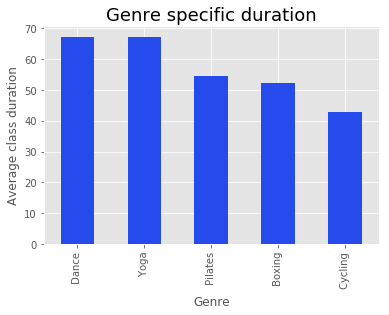

In [777]:
genre_durat.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average class duration')
plt.title('Genre specific duration', fontsize=18)
print(genre_durat)

In [934]:
rat_pri = df[['rating','price','reviews']] #attempt to observe the relationship between class price and its rating

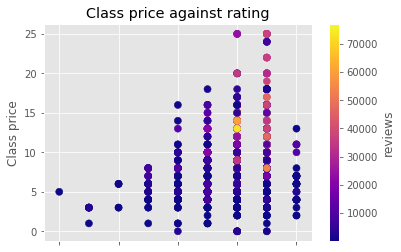

In [944]:
rat_pri.plot(kind='scatter', x='rating',y='price',s = 50,c='reviews',cmap="plasma")
plt.title("Class price against rating")
plt.xlabel("Rating")
plt.ylabel("Class price")
plt.show()

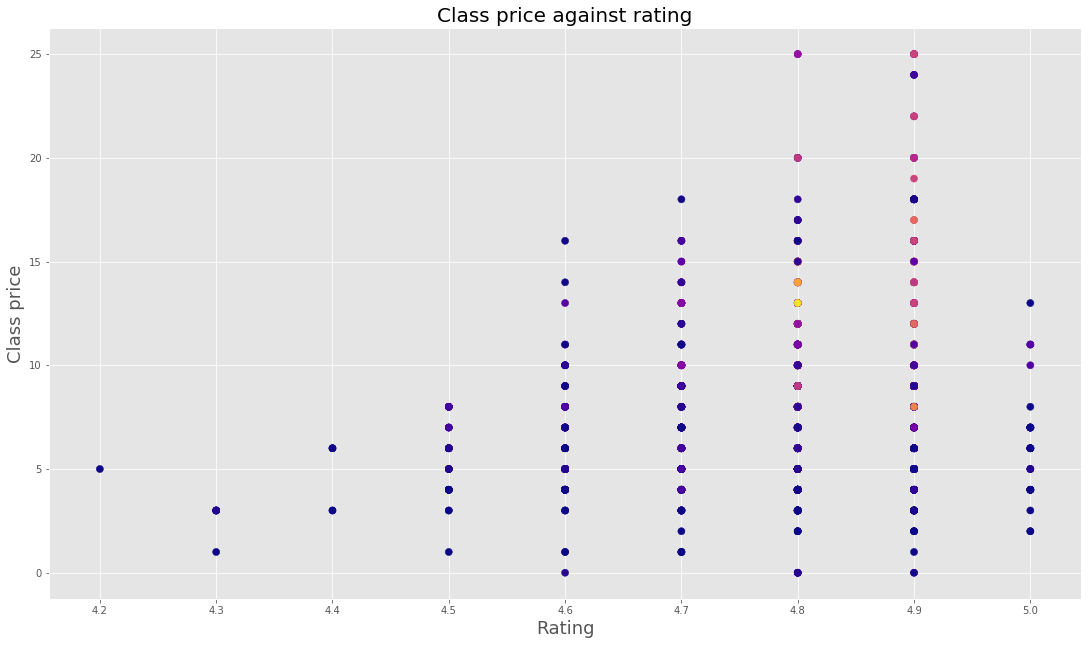

In [949]:
fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(18.5, 10.5)
# rat_pri.plot(kind='scatter', x='rating',y='price',s = 50,c='reviews',cmap="plasma")
plt.scatter(x=rat_pri['rating'],y=rat_pri['price'],s = 50,c=rat_pri['reviews'],cmap="plasma")


plt.title("Class price against rating",fontsize =20)
plt.xlabel("Rating",fontsize = 18)
plt.ylabel("Class price",fontsize = 18)
plt.show()

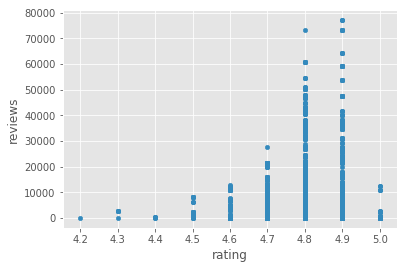

In [911]:
rat_rev = df[['rating','reviews']] #attempt to observe the relationship between number of reviews and rating
rat_rev.plot.scatter('rating','reviews')

In [657]:
print(df.price.mean())
print(df.rating.mean())
print(df.reviews.mean())
print(df.duration.mean())

8.0207991242474
4.7899835796387356
11984.585112205801
58.20361247947455


In [733]:
grouped_venue = df.groupby(['venue','location']).mean() #grouping dataframe by the different gyms
grouped_venue['expensive?'] =(grouped_venue['price']>8.02) #is it expensive?
grouped_venue['highly rated?'] =(grouped_venue['rating']>4.79) #is it highly rated?
grouped_venue['popular?'] =(grouped_venue['reviews']>11984.6) #is it highly rated?
grouped_venue['long?'] =(grouped_venue['duration']>58.2) #is it highly rated?
cleaned_gv = grouped_venue.round(1).sort_values('reviews',ascending=False).head(12)#.mean()['price']
cleaned_gv.drop(['rating', 'reviews','duration','price'], axis=1)
#try using heatmap from plotly - assigning the colour to each value


,,expensive?,highly rated?,popular?,long?
venue,location,,,,
Flywheel Sports: Stadium Cycling,East Village,True,True,True,False
Mile High Run Club,NoMad,True,True,True,False
Peloton Cycling Studio,Chelsea,True,True,True,False
Mile High Run Club,NoHo,True,True,True,False
Flywheel Sports: Stadium Cycling,Flatiron,True,True,True,False
Physique 57,SoHo,True,True,True,True
Flywheel Sports: Stadium Cycling,NoMad,True,True,True,False
Switch Playground USA,Union Square,True,True,True,False
Flywheel Sports: Stadium Cycling,Chelsea,True,True,True,False


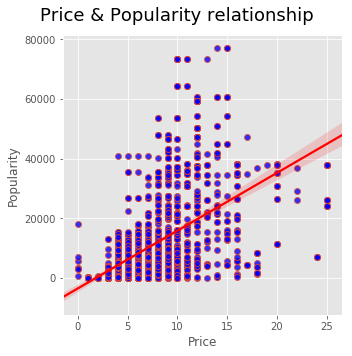

In [787]:
import seaborn as sns
lm = sns.lmplot("price", "reviews", data = df,line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'})
lm = lm.set_axis_labels("Price", "Popularity")
fig = lm.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lm.fig.subplots_adjust(top=.9)